## Predicting Student Admission at UCLA
### Using Keras

In [9]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
import numpy as np
import pandas as pd

In [10]:
data = pd.read_csv('student_data.csv')
data.head(5)

,admit,gre,gpa,rank
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


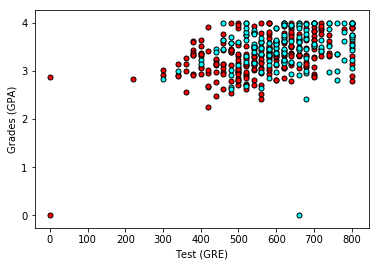

In [25]:
#Visualisation of the Dataset
import matplotlib.pyplot as plt
import numpy as np
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
plot_points(data)
plt.show()



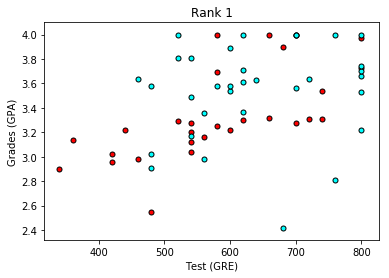

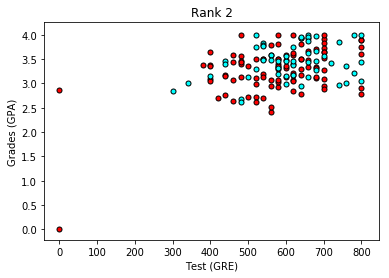

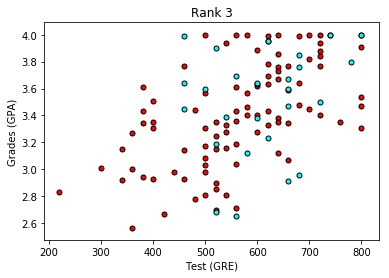

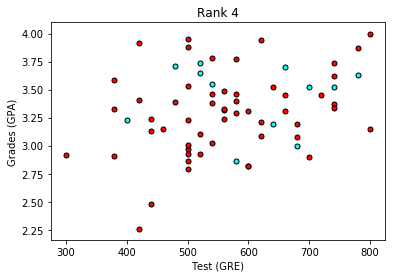

In [26]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()


In [11]:
#data preprocessing
data = data.fillna(0)
pro_data = pd.get_dummies(data,columns=['rank']) 
pro_data['gre']=pro_data['gre']/800
pro_data['gpa']=pro_data['gpa']/4
pro_data.head(5)

,admit,gre,gpa,rank_0.0,rank_1.0,rank_2.0,rank_3.0,rank_4.0
0,0,0.475,0.9025,0,0,0,1,0
1,1,0.825,0.9175,0,0,0,1,0
2,1,1.000,1.0000,0,1,0,0,0
3,1,0.800,0.7975,0,0,0,0,1
4,0,0.650,0.7325,0,0,0,0,1


In [12]:
X=np.array(pro_data)[:,1:]
y=keras.utils.to_categorical(np.array(pro_data['admit']),num_classes=2)
print(X[:5])
print(y[:5])

[[0.475  0.9025 0.     0.     0.     1.     0.    ]
 [0.825  0.9175 0.     0.     0.     1.     0.    ]
 [1.     1.     0.     1.     0.     0.     0.    ]
 [0.8    0.7975 0.     0.     0.     0.     1.    ]
 [0.65   0.7325 0.     0.     0.     0.     1.    ]]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [13]:
(X_train,X_test) = (X[:50],X[50:])
(y_train,y_test) = (y[:50],y[50:])

In [19]:
#making the mffnn model
model = Sequential([
    Dense(128,input_shape=(7,)),
    Activation('sigmoid'),
    Dense(32,activation='sigmoid'),
    Dense(2,activation='sigmoid'),
    
])

model.compile(loss='categorical_crossentropy' , metrics=['accuracy'],optimizer='adam')

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 5,218
Trainable params: 5,218
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)

In [22]:
model.evaluate(X_train,y_train)[1]

50/50 [==============================] - 0s 1ms/step


0.7200000071525574

In [23]:
model.evaluate(X_test,y_test)[1]

350/350 [==============================] - 0s 91us/step


0.6114285738127572